<a href="https://colab.research.google.com/github/tanmy-sharma/NLP-Projects/blob/main/ClassificationOfNewsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing Dataset

In [58]:
df = pd.read_csv("/content/BBCNews.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Dataset Evaluation

In [59]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

We see that our outputs is in string format so let's give each of them a unique number

In [60]:
df['Category_id'] = df['Category'].factorize()[0]
df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


## EDA

**Checking empty spaces**

In [61]:
df.isna().sum().max()

0

**Good no empty values**

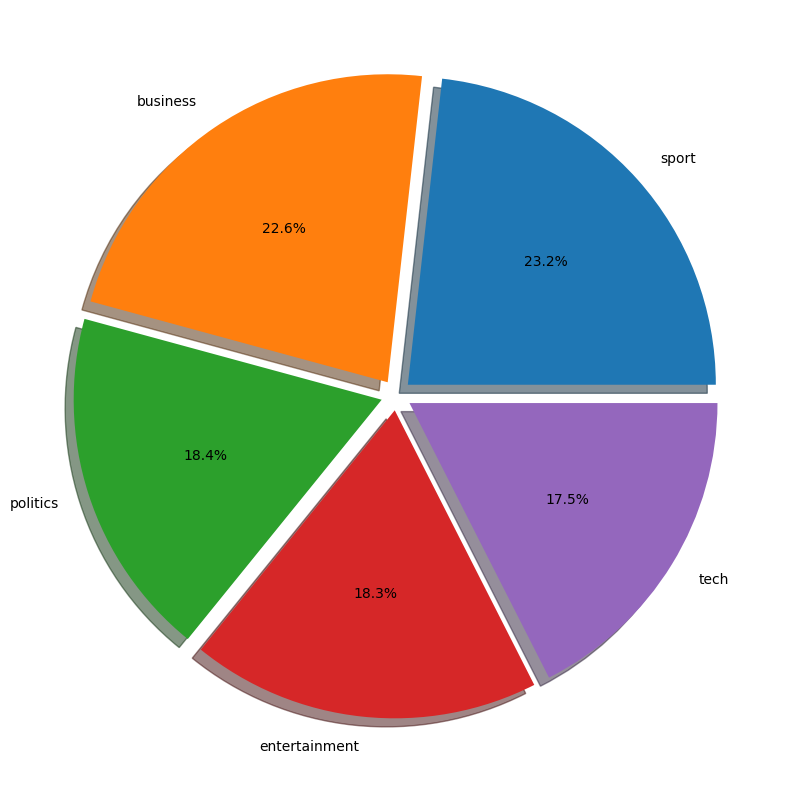

In [62]:
plt.figure(figsize = (10, 10))
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct = "%1.1f%%", shadow = True, explode = (0.05, 0.05, 0.05, 0.05,0.05))
plt.show()

**Removing tags**

In [63]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
  
df['Text'] = df['Text'].apply(remove_tags)

**Removing Special Characters**

In [64]:
def special_char(text):
  sample_text = ''
  for x in text:
    if x.isalnum():
      sample_text = sample_text + x
    else:
      sample_text = sample_text + ' '
  return sample_text

df['Text'] = df['Text'].apply(special_char)

**Converting every word into lower case**

In [65]:
def convert_lower(text):
   return text.lower()
  
df['Text'] = df['Text'].apply(convert_lower)

**Checking the sample data**

In [66]:
df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in 168m payout eighteen former e...,business,0


**Lemmatizing the data**

In [67]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [wordnet.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

df['Text'] = df['Text'].apply(lemmatize_word)
df['Text'][1]

'german business confidence slide german business confidence fell in february knocking hope of a speedy recovery in europe s largest economy munich based research institute ifo said that it confidence index fell to 95 5 in february from 97 5 in january it first decline in three month the study found that the outlook in both the manufacturing and retail sector had worsened observer had been hoping that a more confident business sector would signal that economic activity wa picking up we re surprised that the ifo index ha taken such a knock said dz bank economist bernd weidensteiner the main reason is probably that the domestic economy is still weak particularly in the retail trade economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue germany s economy grew 1 6 last year after shrinking in 2

In [68]:
df.head()

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen in a...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss in 168m payout eighteen former enro...,business,0


## Preprocessing the data

In [69]:
x = np.array(df.iloc[:,0].values)
y = np.array(df.Category_id.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, shuffle = True, test_size = 0.25)

## Model Training

In [79]:
dict_accuracy = {}

In [80]:
model_lr = LogisticRegression().fit(x_train, y_train).predict(x_test)
dict_accuracy['Logistic Regression'] = accuracy_score(y_test, model_lr)

print("Accuracy :", dict_accuracy['Logistic Regression'])

Accuracy : 0.9624664879356568


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
model_svc = SVC().fit(x_train, y_train).predict(x_test)
dict_accuracy['SVM'] = accuracy_score(y_test, model_svc)

print("Accuracy :", dict_accuracy['SVM'])

Accuracy : 0.9436997319034852


In [85]:
model_knn = KNeighborsClassifier().fit(x_train, y_train).predict(x_test)
dict_accuracy['KNN'] = accuracy_score(y_test, model_knn)

print("Accuracy :", dict_accuracy['KNN'])

Accuracy : 0.7426273458445041


In [88]:
model_dt = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train).predict(x_test)
dict_accuracy['DT'] = accuracy_score(y_test, model_knn)

print("Accuracy :", dict_accuracy['DT'])

Accuracy : 0.7426273458445041


In [108]:
model_rf = RandomForestClassifier(n_estimators = 100, max_depth = 7).fit(x_train, y_train).predict(x_test)
dict_accuracy['Random Forest'] = accuracy_score(y_test, model_rf)

print("Accuracy :", dict_accuracy['Random Forest'])

Accuracy : 0.9571045576407506


In [111]:
model_xgb = XGBClassifier().fit(x_train, y_train).predict(x_test)
dict_accuracy['XGB'] = accuracy_score(y_test, model_rf)

print("Accuracy :", dict_accuracy['XGB'])

Accuracy : 0.9571045576407506


In [112]:
model_catboost = CatBoostClassifier().fit(x_train, y_train).predict(x_test)
dict_accuracy['Cat Boost'] = accuracy_score(y_test, model_catboost)

print("Accuracy :", dict['Cat Boost'])

Learning rate set to 0.079575
0:	learn: 1.5338394	total: 290ms	remaining: 4m 49s
1:	learn: 1.4735299	total: 479ms	remaining: 3m 58s
2:	learn: 1.4208974	total: 679ms	remaining: 3m 45s
3:	learn: 1.3603028	total: 837ms	remaining: 3m 28s
4:	learn: 1.3110452	total: 1.04s	remaining: 3m 27s
5:	learn: 1.2670341	total: 1.25s	remaining: 3m 26s
6:	learn: 1.2206987	total: 1.47s	remaining: 3m 28s
7:	learn: 1.1831901	total: 1.71s	remaining: 3m 31s
8:	learn: 1.1412233	total: 1.94s	remaining: 3m 33s
9:	learn: 1.1065274	total: 2.21s	remaining: 3m 39s
10:	learn: 1.0715229	total: 2.45s	remaining: 3m 40s
11:	learn: 1.0363890	total: 2.65s	remaining: 3m 38s
12:	learn: 1.0028743	total: 2.86s	remaining: 3m 36s
13:	learn: 0.9760732	total: 3.05s	remaining: 3m 34s
14:	learn: 0.9475169	total: 3.24s	remaining: 3m 32s
15:	learn: 0.9212870	total: 3.42s	remaining: 3m 30s
16:	learn: 0.9004274	total: 3.62s	remaining: 3m 29s
17:	learn: 0.8820642	total: 3.77s	remaining: 3m 25s
18:	learn: 0.8599039	total: 3.95s	remaining:

In [115]:
print("Accuracy :", dict_accuracy['Cat Boost'])

Accuracy : 0.9705093833780161


In [114]:
model_adaboost = AdaBoostClassifier().fit(x_train, y_train).predict(x_test)
dict_accuracy['Ada Boost'] = accuracy_score(y_test, model_adaboost)

print("Accuracy :", dict_accuracy['Ada Boost'])

Accuracy : 0.7426273458445041


In [116]:
sorted_accuracy = sorted(dict_accuracy, key=lambda x: dict_accuracy[x], reverse=True)

In [121]:
for key in sorted_accuracy:
  print(key, ":", dict_accuracy[key])

Cat Boost : 0.9705093833780161
Logistic Regression : 0.9624664879356568
Random Forest : 0.9571045576407506
XGB : 0.9571045576407506
SVM : 0.9436997319034852
KNN : 0.7426273458445041
DT : 0.7426273458445041
Ada Boost : 0.7426273458445041


**So, we get our best model as Cat Boost Classifier with a 97.05% accuracy**